## PROJECT: HEART_DISEASE_PREDICTION
#
MADE BY : SAHIL WADHWA


In [16]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import StackingClassifier
from google.colab import files
import warnings
warnings.filterwarnings('ignore')


In [7]:
def Normalization(X,y):
  # 🔹 Train-Test Split
  X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
  )

  # 🔹 Scale features
  scaler = RobustScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)
  return(X_train,y_train,X_test,y_test)

In [25]:
def Visualization():
  # Count the classes
  total_counts = df['condition'].value_counts()
  heart_sick = total_counts[1]  # Patients with heart disease
  not_sick = total_counts[0]    # Healthy patients

  print(f"Heart Disease Dataset Analysis:")
  print(f"Patients with heart disease: {heart_sick}")
  print(f"Healthy patients: {not_sick}")
  print(f"Total patients: {heart_sick + not_sick}")

  # Create the comparison plot
  plt.figure(figsize=(10, 6))
  categories = ['Not Sick', 'Sick']
  counts = [not_sick, heart_sick]
  colors = ['lightblue', 'lightcoral']

  plt.bar(categories, counts, color=colors, alpha=0.8, edgecolor='black')
  plt.title('Heart Disease Dataset: Sick vs Not Sick Distribution', fontsize=16, fontweight='bold')
  plt.xlabel('Patient Status', fontsize=12)
  plt.ylabel('Number of Patients', fontsize=12)

  # Add value labels on bars
  for i, count in enumerate(counts):
    plt.text(i, count + 5, str(count), ha='center', fontsize=14, fontweight='bold')
    percentage = (count / (heart_sick + not_sick)) * 100
    plt.text(i, count/2, f'{percentage:.1f}%', ha='center', fontsize=12, color='white', fontweight='bold')

  plt.ylim(0, max(counts) + 30)
  plt.grid(axis='y', alpha=0.3)
  plt.tight_layout()
  plt.show()

In [20]:
def Model(X_train,y_train,X_test,y_test):
  # Define base models (Level-0)
  base_models = [
        ('lr', LogisticRegression(C=1.0, random_state=42)),
        ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
        ('svm', SVC(probability=True, random_state=42)),
        ('et', ExtraTreesClassifier(n_estimators=100, random_state=42))
    ]

  # Define meta-model (Level-1)
  meta_model = ExtraTreesClassifier(n_estimators=100, random_state=42)

  # Create stacking classifier
  stacking_clf = StackingClassifier(
        estimators=base_models,
        final_estimator=meta_model,
        cv=5,  # Cross-validation folds
        stack_method='auto'
    )

    # Train the stacked model
  stacking_clf.fit(X_train, y_train)

  # Make predictions
  y_pred = stacking_clf.predict(X_test)

  #model.fit(X_train, y_train)
  #y_pred = model.predict(X_test)

  print(y_pred)
  print("🔹 Model Accuracy:", accuracy_score(y_test, y_pred))
  print(classification_report(y_test, y_pred))
  return (stacking_clf,y_pred)


In [19]:
def predict_heart_disease(model):
    print("Please enter the following medical details:")

    age = float(input("Age: "))
    sex = float(input("Sex (0 = female, 1 = male): "))
    cp = float(input("Chest pain type (0-3): "))
    trestbps = float(input("Resting blood pressure (mm Hg): "))
    chol = float(input("Serum cholesterol (mg/dl): "))
    fbs = float(input("Fasting blood sugar > 120 mg/dl (0 = no, 1 = yes): "))
    restecg = float(input("Resting ECG results (0-2): "))
    thalach = float(input("Maximum heart rate achieved: "))
    exang = float(input("Exercise induced angina (0 = no, 1 = yes): "))
    oldpeak = float(input("ST depression induced by exercise: "))
    slope = float(input("Slope of peak exercise ST segment (0-2): "))
    ca = float(input("Number of major vessels (0-3): "))
    thal = float(input("Thalassemia type (0-3): "))

    user_data = pd.DataFrame([[age, sex, cp, trestbps, chol, fbs, restecg,
                             thalach, exang, oldpeak, slope, ca, thal]],
                           columns=X.columns)

    prediction = model.predict(user_data)
    probability = model.predict_proba(user_data)

    print("\nPrediction Results:")
    print("-------------------")
    print(f"Condition: {'Heart Disease' if prediction[0] == 1 else 'No Heart Disease'}")
    print(f"Confidence: {probability[0][prediction[0]]*100:.2f}%")

    if prediction[0] == 1:
        print("\nRecommendation: Please consult a cardiologist.")
    else:
        print("\nRecommendation: Your heart health looks good, but maintain regular checkups.")



In [ ]:
#MAIN
uploaded = files.upload()
df = pd.read_csv('heart_cleveland_upload.csv')
print(df.head())

X = df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']]
Y = df['condition']

data = Normalization(X,Y)
Visualization()
model = Model(data[0],data[1],data[2],data[3])

predict_heart_disease(model[0])

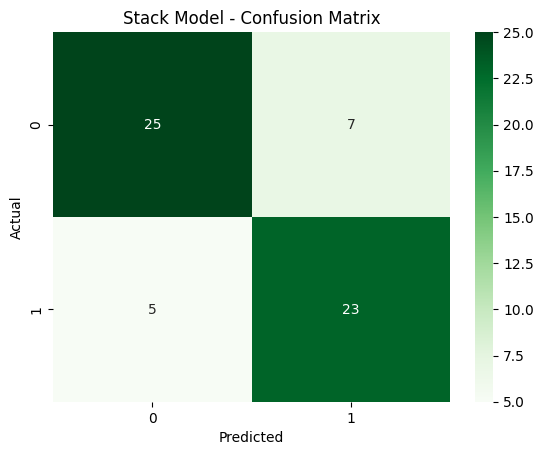

In [28]:
sns.heatmap(confusion_matrix(data[3], model[1]), annot=True, fmt='d', cmap="Greens")
plt.title("Stack Model - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
